# Exercise 2

## a)

Analoger Filter:

\begin{equation}
H(s) = \frac{1}{1 + \frac{s}{\omega_c}}
\end{equation}

Bilineare transformation mit:

\begin{equation}
s = 2f_s \frac{z-1}{z+1}
\end{equation}

Einsetzen ergibt:
\begin{equation}
H_d(z) = \frac{1}{1+ \frac{2f_s}{\omega_c} \frac{z-1}{z+1}}
\\
=\frac{1+z^{-1}}{(1+\frac{2f_s}{\omega_c}) + (1-\frac{2f_s}{\omega_c})z^{-1}}
\end{equation}

## b)

Analoger Tiefpassfilter kann geschrieben werden als:

\begin{equation}
H(s) = \frac{1}{1 + a_1\frac{s}{\omega_c} + b_1(\frac{s}{\omega_c})^2}
\end{equation}

Unser gegebener Tiefpassfilter erster Ordung:
\begin{equation}
H(s) = \frac{1}{1 + \frac{s}{\omega_c}}
\end{equation}

Normale Notation für die Transferfunktion von Analogen Filtern zweiter Ordnung:

\begin{equation}
H(s) = \frac{B_0s^2 + B_1s + B_2}{A_0s^2 + A_1s +A_2}
\end{equation}

Durch den Vergleich der normalen Notation und unserem gegeben Filter ergibt sich:

\begin{equation}
B_0 = 0,  B_1=0,  B_2=1,  A_0 = \frac{b_1}{\omega_c^2}=0,  A1 = \frac{a_1}{\omega_c} = \frac{1}{\omega_c},  A2 = 1
\end{equation}

Nach der Substitution von $s = 2f_s \frac{z-1}{z+1}$ wollen wir folgende Form erhalten:

\begin{equation}
H(z) = \frac{b_0 + b_1z^{-1} + b_2z^{-2}}{1 + a_1z^{-1} +a_2z^{-2}}
\end{equation}

Rechenweg:
\begin{equation}
\frac{B_0(2f_s \frac{z-1}{z+1})^2 + B_1(2f_s \frac{z-1}{z+1}) + B_2}{A_0(2f_s \frac{z-1}{z+1})^2 + A_1(2f_s \frac{z-1}{z+1}) +A_2}
\\
= ... = \frac{ 
\frac{B_04f_s^2+B_12f_s+B_2}{A_04f_s^2+A_12f_s+A_2} + \frac{-B_08f_s^2+2B_2}{A_04f_s^2+A_12f_s+A_2}z^{-1} + \frac{B_04f_s^2-B_12f_s+B_2}{A_04f_s^2+A_12f_s+A_2}z^{-2} } {
1+
\frac{-A_08f_s^2+2A_2}{A_04f_s^2+A_12f_s+A_2}z^{-1}
\frac{A_04f_s^2-A_12f_s+A_2}{A_04f_s^2+A_12f_s+A_2}z^{-2}}
\end{equation}


Die Koeffizienten des digitalen Filters sind daher:

\begin{equation}
b_0 = \frac{B2+2B_1f_s + 4B_0f_s^2}{A_2 + 2A_1f_s + 4A_0f_s^2}
=\frac{1}{1+\frac{2f_s}{\omega_c}}
\\
b_1 = \frac{2B2 - 8B_0f_s^2}{A_2 + 2A_1f_s + 4A_0f_s^2}
=\frac{2}{1+\frac{2f_s}{\omega_c}}
\\
b_2 = \frac{B2+2B_1f_s - 4B_0f_s^2}{A_2 + 2A_1f_s + 4A_0f_s^2}
=\frac{1}{1+\frac{2f_s}{\omega_c}}
\\
a_1 = \frac{2A_2 - 8A_0f_s^2}{A_2 + 2A_1f_s + 4A_0f_s^2}
=\frac{2}{1+\frac{2f_s}{\omega_c}}
\\
a_2 = \frac{A2-2A_1f_s + 4A_0f_s^2}{A_2 + 2A_1f_s + 4A_0f_s^2}
=\frac{1- \frac{2f_s}{\omega_c}}{1+\frac{2f_s}{\omega_c}}
\end{equation}

## c), d), e)

c) calculate the coefficients

In [148]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

fs = 48000 #Hz
fc = 10000 #Hz

omc = 2*np.pi*fc
omc_wrapped = 2*fs *np.tan(np.pi * fc / fs)

#Coefficients without pre-wrapping:
b0 = 1 / ( 1 + 2 *fs / omc)
b1 = 2 / ( 1 + 2 *fs / omc)
b2 = 1 / ( 1 + 2 *fs / omc)
b = [b0, b1, b2]

a1 = 2 / ( 1 + 2 *fs / omc)
a2 = (1 - 2 * fs / omc) / ( 1 + 2 *fs / omc)
a = ([1, a1, a2])
#a = [1, a1, a0]

#Coefficients with pre-wrapping
b0_w = 1 / ( 1 + 2 *fs / omc_wrapped)
b1_w = 2 / ( 1 + 2 *fs / omc_wrapped)
b2_w = 1 / ( 1 + 2 *fs / omc_wrapped)
b_wrapped = [b0_w, b1_w, b2_w]

a1_w = 2 / ( 1 + 2 *fs / omc_wrapped)
a2_w = (1 - 2 * fs / omc_wrapped) / ( 1 + 2 *fs / omc_wrapped)
a_wrapped = [1, a1_w, a2_w]

print("Coefficients of the digital filter in biquad structure:\n")
print("a = ", a)
print("b = ",b)


print("\nCoefficients of the digital filter in biquad structure with pre-wrapping:\n")
print("a = ",a_wrapped)
print("b = ",b_wrapped)

Coefficients of the digital filter in biquad structure:

a =  [1, 0.7911744635176464, -0.20882553648235358]
b =  [0.3955872317588232, 0.7911744635176464, 0.3955872317588232]

Coefficients of the digital filter in biquad structure with pre-wrapping:

a =  [1, 0.8683475024126042, -0.13165249758739586]
b =  [0.4341737512063021, 0.8683475024126042, 0.4341737512063021]


b) visualise magnitude transfer function

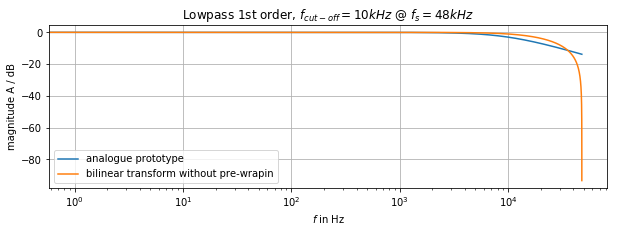

In [149]:
#freuquency vector
f = np.arange(0,fs,1) #frquency range
s = 1j *np.pi * 2 * f
# Analog Filter
Ha = 1 / (1 + s / omc) 

#bilinear transform without pre-wraping
Om, Hd = sig.freqz(b, a, worN=48000)
#Compute the frequency response of a digital filter., worN musste genutzt werden, weil fs-argument komischerweise nicht erkannt wurde
#compute z-vector
#       #z⁻2
#Om = 2 * np.arctan(np.pi * f / fs)
#z = np.asarray([np.e**(1j *2*Om), np.e**(1j * Om), 1])
#Hd = np.sum(b*z) / np.sum(a*z)


#bilinear transform with pre-wraping
Om_w, Hd_wrapped = sig.freqz(b_wrapped, a_wrapped, worN=48000)

#Plot Magnitude
plt.figure(figsize=(10,3))
plt.semilogx(f, 20*np.log10(np.abs(Ha)), label=r'analogue prototype')
plt.semilogx(f, 20*np.log10(np.abs(Hd)), label=r'bilinear transform without pre-wrapin')
#plt.semilogx(f, 20*np.log10(np.abs(Hd_wrapped)), label=r'bilinear transform with pre-wrapin')
plt.xlabel(r'$f$ in Hz')
plt.ylabel(r'magnitude A / dB')
plt.grid()
plt.title(r'Lowpass 1st order, $f_{cut-off} = 10 kHz$ @ $f_s = 48 kHz$')
plt.legend()
#plt.axis([10, fs, -16, 4])

[10, 48000, -180, 180]

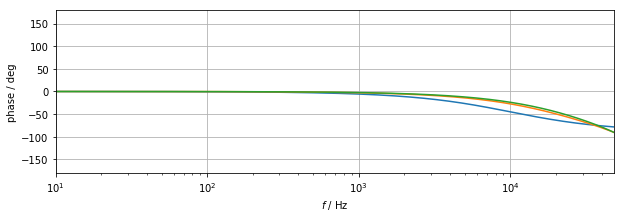

In [150]:
#Plot Angle
plt.figure(figsize=(10,3))
plt.semilogx(f, (180 / np.pi) * np.angle(Ha), label=r'analogue prototype')
plt.semilogx(f, (180 / np.pi) * np.angle(Hd), label=r'bilinear transform without pre-wrapin')
plt.semilogx(f, (180 / np.pi) * np.angle(Hd_wrapped), label=r'bilinear transform with pre-wrapin')
plt.xlabel(r'$f$ / Hz')
plt.ylabel(r'phase / deg')
plt.grid()
#plt.title(r'Lowpass 1st order, $f_{cut-off} = 10 kHz$ @ $f_s = 48 kHz$')
plt.axis([10, fs, -180, 180])